In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset
df = sns.load_dataset('titanic')

# Show first 5 rows
print(df.head())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [ ]:
# Dataset info
print(df.info())

# Statistical summary (numerical + categorical)
print(df.describe(include='all'))

# Value counts for key categorical features
print(df['sex'].value_counts())
print(df['class'].value_counts())
print(df['embarked'].value_counts())
print(df['who'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None
          survived      pclass   sex         age       sibsp       parch  

In [ ]:
print(df.isnull().sum()) 


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


<Figure size 1000x600 with 0 Axes>

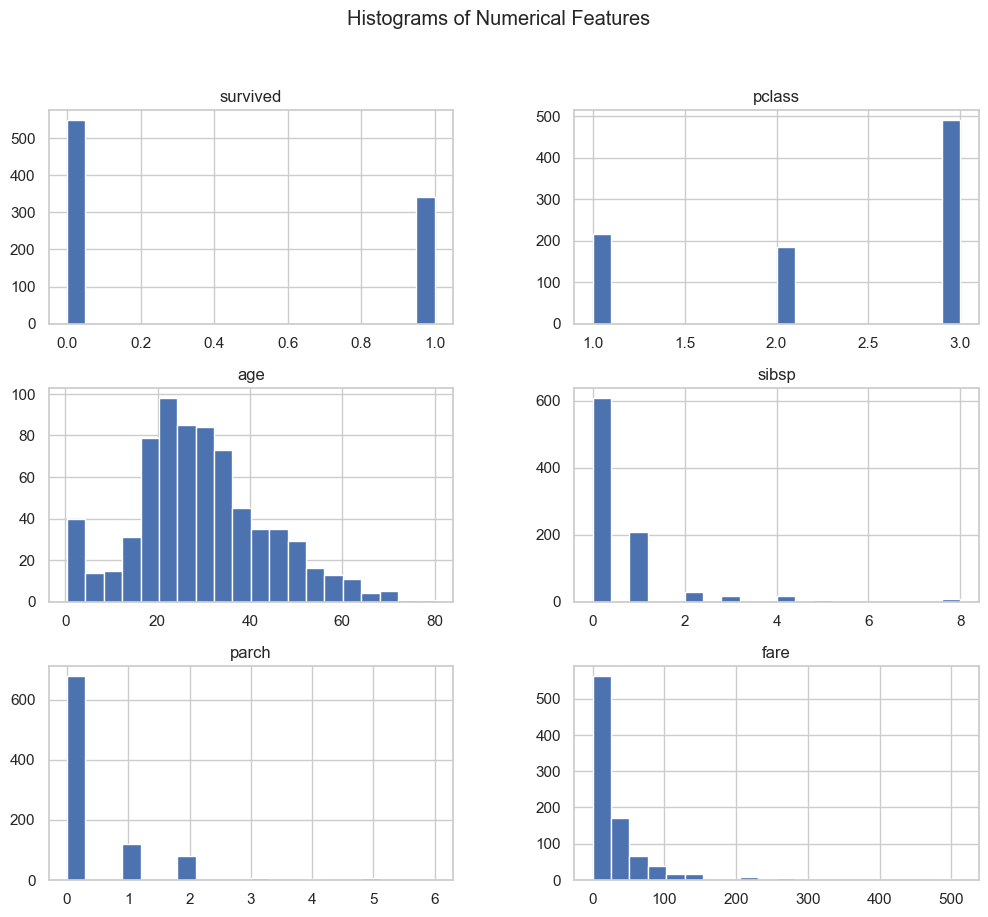

In [ ]:
df.hist(figsize=(12, 10), bins=20)
plt.suptitle("Histograms of Numerical Features")
plt.show()


### Age Distribution Observation
- The Age distribution is right-skewed, with most passengers between 20 and 40 years old.
- There are fewer children and elderly passengers.


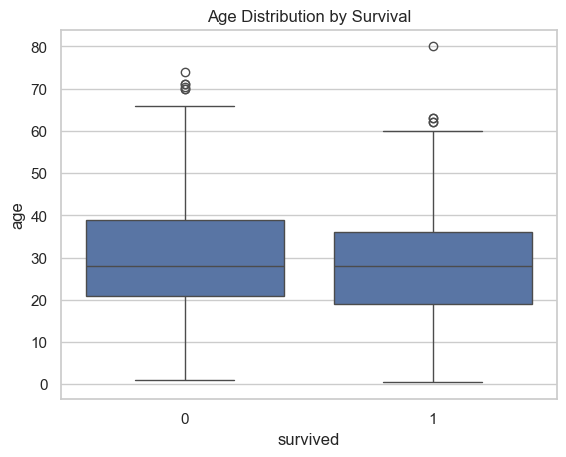

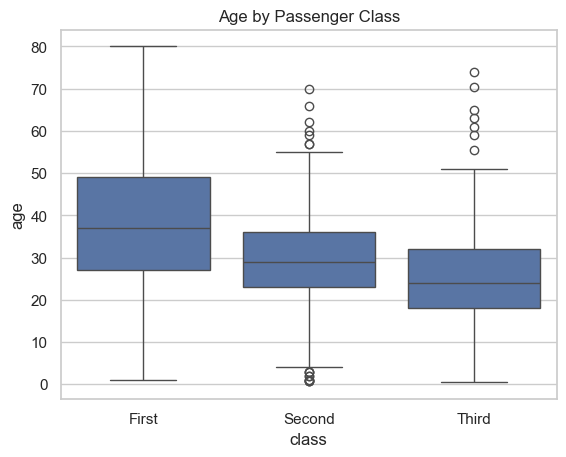

In [ ]:
# Age distribution across survival
sns.boxplot(x='survived', y='age', data=df)
plt.title('Age Distribution by Survival')
plt.show()

# Age distribution across class
sns.boxplot(x='class', y='age', data=df)
plt.title('Age by Passenger Class')
plt.show()


### Age vs Survival Boxplot Observation
- Survivors tended to be slightly younger on average.
- The median age of survivors is lower compared to non-survivors.
- There are some outliers in age in both groups.


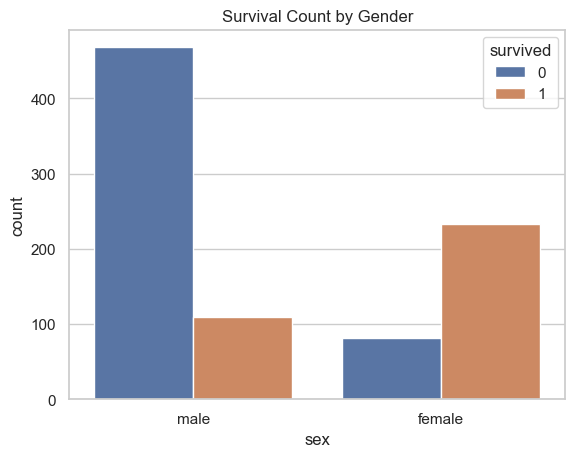

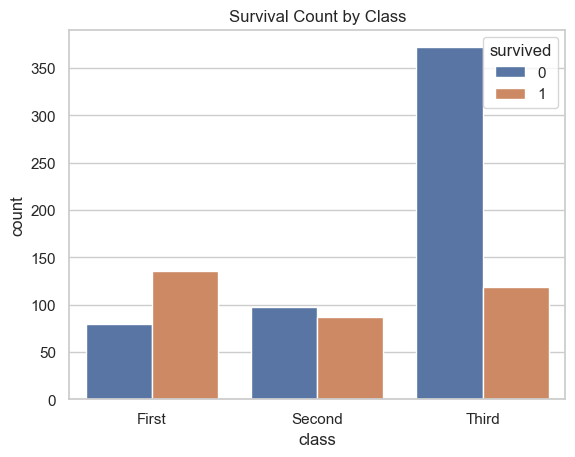

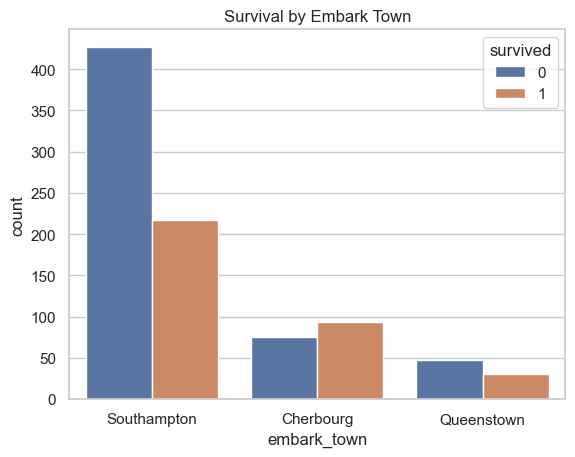

In [ ]:
# Survival by sex
sns.countplot(x='sex', hue='survived', data=df)
plt.title('Survival Count by Gender')
plt.show()

# Survival by class
sns.countplot(x='class', hue='survived', data=df)
plt.title('Survival Count by Class')
plt.show()

# Embarkation town
sns.countplot(x='embark_town', hue='survived', data=df)
plt.title('Survival by Embark Town')
plt.show()


### Survival by Sex Observation
- Females had a much higher survival rate than males.
- Most males did not survive, whereas the majority of females did.


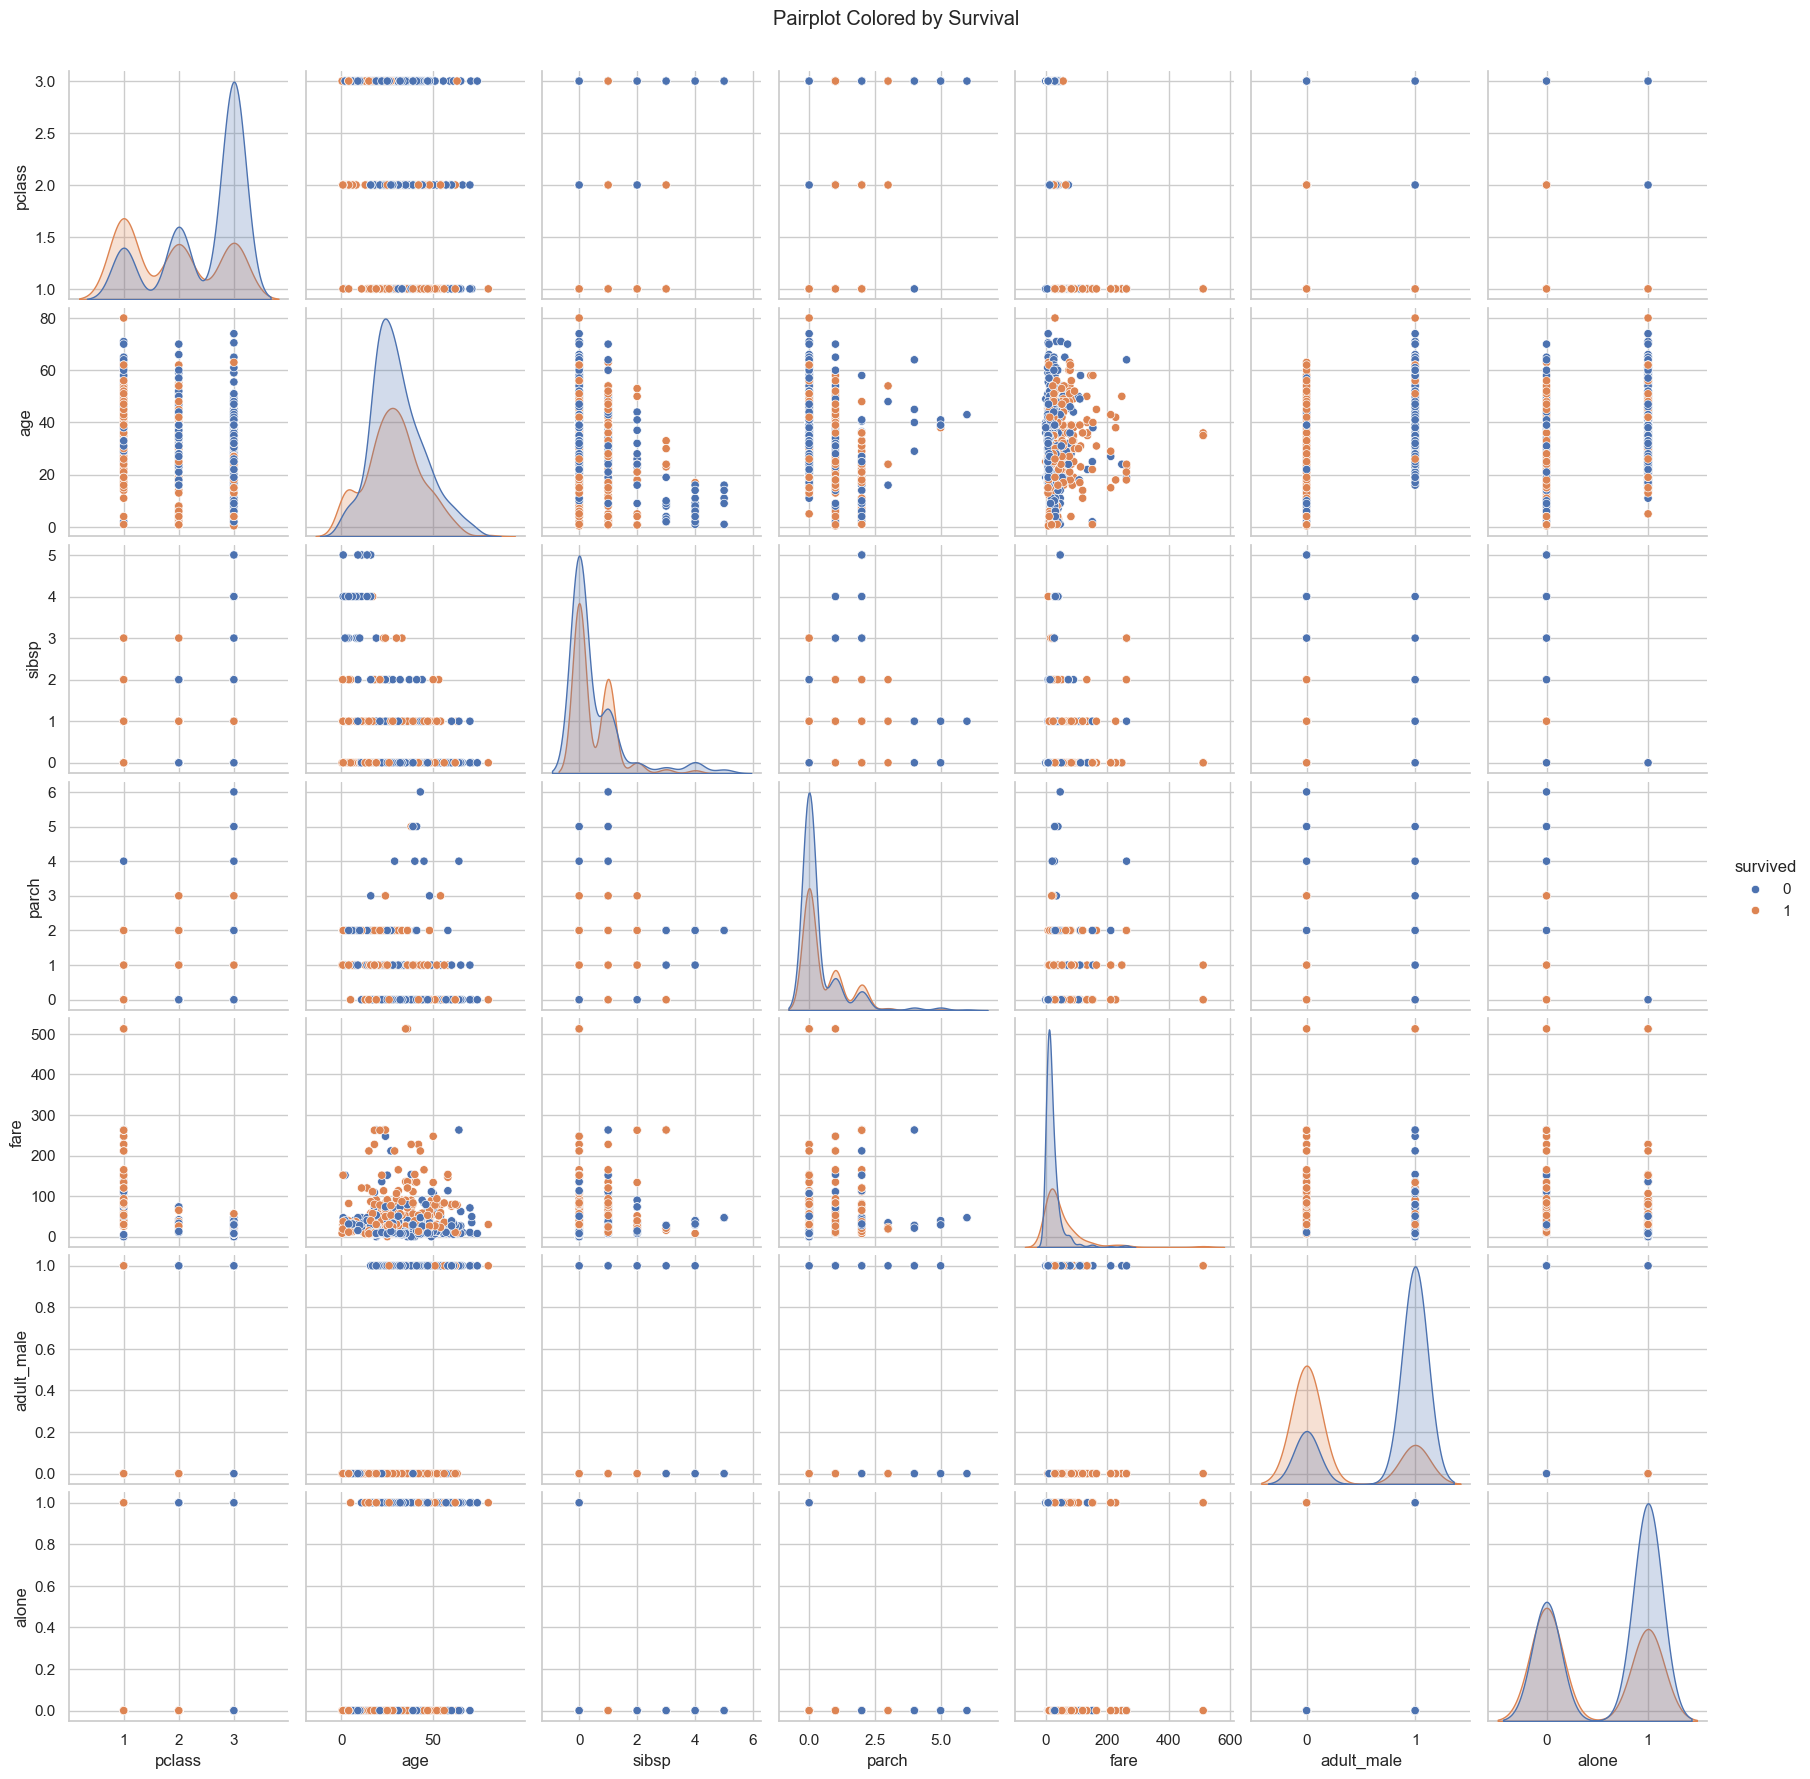

In [ ]:
sns.pairplot(df.dropna(subset=['age']), hue='survived')
plt.suptitle('Pairplot Colored by Survival', y=1.02)
plt.show()


### Pairplot Analysis Observation

- Survivors tend to be younger and pay higher fares.
- No clear survival difference based on family size (siblings/spouses or parents/children).
- Passenger class and fare are important factors in survival.


<Figure size 1000x600 with 0 Axes>

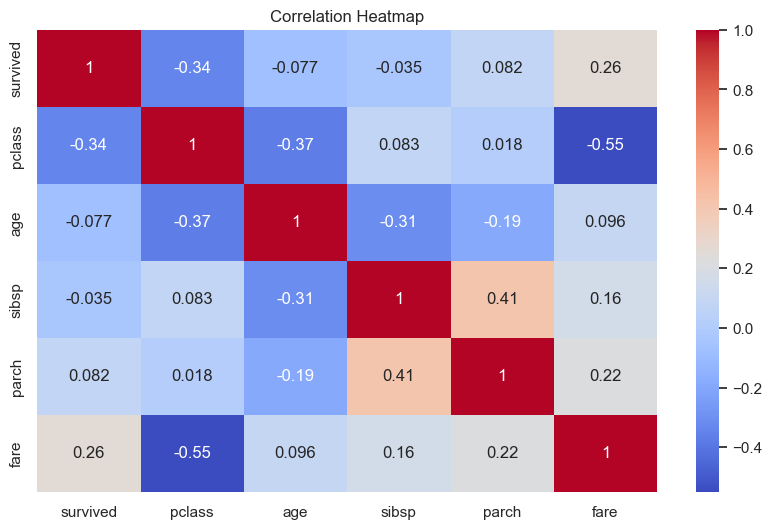

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


### Correlation Heatmap Observation
- Fare and Pclass show a notable correlation with survival.
- Fare is negatively correlated with Pclass (higher class means higher fare).
- Age shows little correlation with survival.


## Summary of Findings

- **Age:** Younger passengers had a higher likelihood of survival.
- **Sex:** Females were much more likely to survive than males.
- **Passenger Class:** First-class passengers had better survival chances compared to second and third class.
- **Fare:** Passengers who paid higher fares tended to survive more often.
- **Embarkation Point:** Passengers boarding from Cherbourg showed slightly higher survival rates.
- **Family Size:** Traveling with family slightly increased chances of survival.
- **Missing Data:** Important features like `age` and `deck` have missing values, which should be considered in further analysis.
